<a href="https://colab.research.google.com/github/lathamithu/DSCWOW_/blob/main/Warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pylab as pl 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:
data = pd.read_csv("birac.csv")
data.drop(data.columns[[0]], axis = 1, inplace = True)
data.head()

,STATE,MONTH,HUMIDITY,TEMPERATURE,MOISTURE,SAFE
0,TN,JAN,75,25,8,395
1,TN,JAN,77,25,14,143
2,TN,JAN,76,25,29,19
3,TN,JAN,72,25,20,64
4,TN,JAN,73,25,15,64


In [ ]:
data.shape

(1476, 6)

In [ ]:
data.isnull().sum()

STATE          0
MONTH          0
HUMIDITY       0
TEMPERATURE    0
MOISTURE       0
SAFE           0
dtype: int64

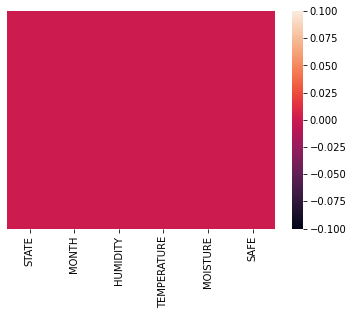

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False)

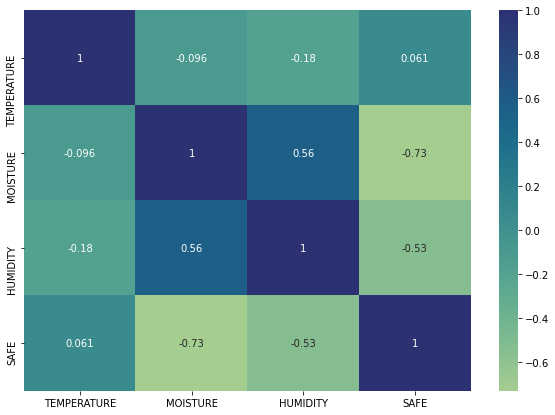

In [ ]:
data = data.replace('NIL',np.nan)
data = data.dropna()
data = data.reset_index(drop=True)

corr_matrix = data[['TEMPERATURE', 'MOISTURE', 'HUMIDITY','SAFE']].astype(int).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap='crest',annot=True)

*DATA PREPROCESSING*

In [ ]:
arr = data['SAFE'].values
print(arr)
for i in range(len(arr)):
  if(arr[i] == 'NIL'):
    data.at[i, 'STATUS'] = -1
  elif(int(arr[i])<=7):
    data.at[i, 'STATUS'] = 0
  elif((int(arr[i])>7)&(int(arr[i])<=42)):
    data.at[i, 'STATUS'] = 1
  elif((int(arr[i])>42)&(int(arr[i])<=60)):
    data.at[i, 'STATUS'] = 2
  elif((int(arr[i])>60)&(int(arr[i])<=349)):
    data.at[i, 'STATUS'] = 3
  elif((int(arr[i])>349)):
    data.at[i, 'STATUS'] = 4

['395' '143' '19' ... '464' '19' '0']


In [ ]:
data['DESCRIPTION']=data['STATUS'].map({-1:'No information',0:'Requires immediate dispatch',1:'Moderate to store for 6 weeks',2:'Good to store for 2 months',3:'Good to store for 8-12 months',4:'Very good to store more than a year'})

data

,STATE,MONTH,HUMIDITY,TEMPERATURE,MOISTURE,SAFE,STATUS,DESCRIPTION
0,TN,JAN,75,25,8,395,4.0,Very good to store more than a year
1,TN,JAN,77,25,14,143,3.0,Good to store for 8-12 months
2,TN,JAN,76,25,29,19,1.0,Moderate to store for 6 weeks
3,TN,JAN,72,25,20,64,3.0,Good to store for 8-12 months
4,TN,JAN,73,25,15,64,3.0,Good to store for 8-12 months
...,...,...,...,...,...,...,...,...
1459,AP,DEC,48,21,16,64,3.0,Good to store for 8-12 months
1460,AP,DEC,52,23,12,273,3.0,Good to store for 8-12 months
1461,AP,DEC,48,21,5,464,4.0,Very good to store more than a year
1462,AP,DEC,40,23,25,19,1.0,Moderate to store for 6 weeks


*TRAINING THE DATA*

In [ ]:
x = data.drop(['STATE','MONTH','SAFE','STATUS','DESCRIPTION'], axis = 1)
y = data['SAFE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

**FITTING AND PREDICTION**

*1) RBF OR THE GAUSSIAN KERNEL*

In [ ]:
svclassifier1 = SVC(kernel = 'rbf')
svclassifier1.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred1 = svclassifier1.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[98  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8]
 [ 0  0 43  0  0  0  0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  1]
 [ 0  0  0  4  0  0  2  0  0  0  0  0  1]
 [ 0  0  0  2  0  0  9  0  0  0  0  0  2]
 [ 0  0  0  1  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  2  3  0  0  3  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
         143       0.00      0.00      0.00         8
          19       1.00      0.93      0.97        46
         243       0.00      0.00      0.00         4
         273       0.00      0.00      0.00         7
         319       0.00      0.00      0.00        13
         349       0.16      0.83      0.26         6
         365       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,y_pred1)*100)

80.2047781569966


*2) LINEAR KERNEL*

In [ ]:
svclassifier2 = SVC(kernel = 'linear')
svclassifier2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred2 = svclassifier2.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[98  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
         143       1.00      1.00      1.00         8
          19       1.00      1.00      1.00        46
         243       1.00      1.00      1.00         4
         273       1.00      1.00      1.00         7
         319       1.00      1.00      1.00        13
         349       1.00      1.00      1.00         6
         365       1

In [ ]:
print(accuracy_score(y_test,y_pred2)*100)

100.0


*3) POLYNOMIAL KERNEL*

In [ ]:
svclassifier3 = SVC(kernel = 'poly', degree = 11)
svclassifier3.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=11, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred3 = svclassifier3.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[98  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  6  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
         143       1.00      1.00      1.00         8
          19       1.00      0.96      0.98        46
         243       1.00      0.75      0.86         4
         273       0.60      0.86      0.71         7
         319       0.90      0.69      0.78        13
         349       0.83      0.83      0.83         6
         365       0

In [ ]:
print(accuracy_score(y_test,y_pred3)*100)

94.88054607508532


*4) SIGMOID KERNEL*

In [ ]:
svclassifier4 = SVC(kernel = 'sigmoid')
svclassifier4.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred4 = svclassifier4.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[98  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0]
 [46  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [60  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        98
         143       0.00      0.00      0.00         8
          19       0.00      0.00      0.00        46
         243       0.00      0.00      0.00         4
         273       0.00      0.00      0.00         7
         319       0.00      0.00      0.00        13
         349       0.00      0.00      0.00         6
         365       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(y_test,y_pred4)*100)

33.44709897610921


**TEST DATA**

In [ ]:
days = int(svclassifier2.predict([[76, 25, 11]]))

In [ ]:
  print('RESULT :-\n\n')
  if(days<=7):
    print('\tCONDITION OF STOCK : Requires immediate dispatch\n\n\tNUMBER OF DAYS FOR SAFE STORAGE (approx.) : ' + str(days) + ' days')
  elif((days>7)&(days<=42)):
    print('\tCONDITION OF STOCK : Moderate to store for 6 weeks\n\n\tNUMBER OF DAYS FOR SAFE STORAGE (approx.) : ' + str(days) + ' days')
  elif((days>42)&(days<=60)):
    print('\tCONDITION OF STOCK : Good to store for 2 months\n\n\tNUMBER OF DAYS FOR SAFE STORAGE (approx.) : ' + str(days) + ' days')
  elif((days>60)&(days<=349)):
    print('\tCONDITION OF STOCK : Good to store for 8-12 months\n\n\tNUMBER OF DAYS FOR SAFE STORAGE (approx.) : ' + str(days) + ' days')
  elif(days>349):
    print('\tCONDITION OF STOCK : Very good to store more than a year\n\n\tNUMBER OF DAYS FOR SAFE STORAGE (approx.) : ' + str(days) + ' days')


RESULT :-


	CONDITION OF STOCK : Good to store for 8-12 months

	NUMBER OF DAYS FOR SAFE STORAGE (approx.) : 319 days


**OBSERVATION**

In [ ]:
tn_mask=data['STATE']=='TN'
tn_data = data[tn_mask]
tn_data = tn_data.replace('NIL',np.nan)
tn_data = tn_data.dropna()
tn_data = tn_data.reset_index(drop=True)

ka_mask=data['STATE']=='KARNATAKA'
ka_data = data[ka_mask]
ka_data = ka_data.replace('NIL',np.nan)
ka_data = ka_data.dropna()
ka_data = ka_data.reset_index(drop=True)

kl_mask=data['STATE']=='KERALA'
kl_data = data[kl_mask]
kl_data = kl_data.replace('NIL',np.nan)
kl_data = kl_data.dropna()
kl_data = kl_data.reset_index(drop=True)

ap_mask=data['STATE']=='AP'
ap_data = data[ap_mask]
ap_data = ap_data.replace('NIL',np.nan)
ap_data = ap_data.dropna()
ap_data = ap_data.reset_index(drop=True)

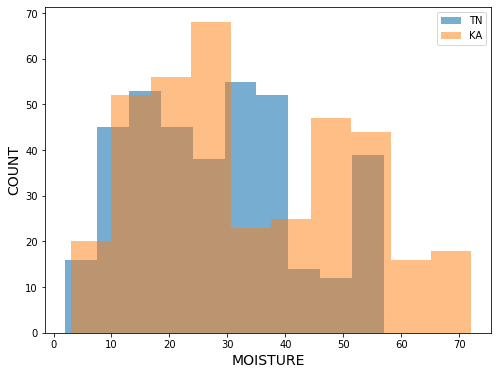

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(tn_data["MOISTURE"].astype(int),alpha=0.6,label='TN')
plt.hist(ka_data["MOISTURE"].astype(int),alpha=0.5,label='KA')
plt.xlabel("MOISTURE", size=14)
plt.ylabel("COUNT", size=14)
plt.legend(loc='upper right')

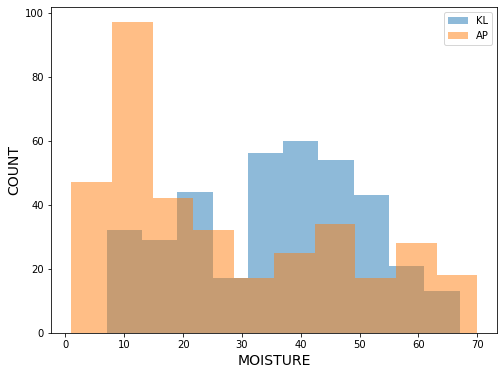

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(kl_data["MOISTURE"].astype(int),alpha=0.5,label='KL')
plt.hist(ap_data["MOISTURE"].astype(int),alpha=0.5,label='AP')
plt.xlabel("MOISTURE", size=14)
plt.ylabel("COUNT", size=14)
plt.legend(loc='upper right')

[Text(0.5, 1.0, 'OVERALL STOCK STATUS IN 4 STATES')]

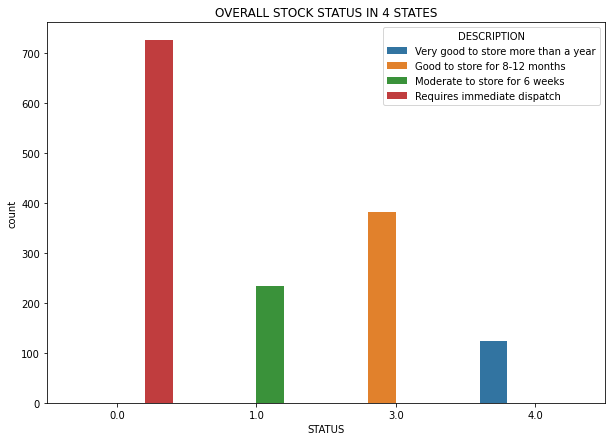

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'STATUS',hue = 'DESCRIPTION', data = data).set(title='OVERALL STOCK STATUS IN 4 STATES')

[Text(0.5, 1.0, 'STOCK STATUS IN TAMILNADU')]

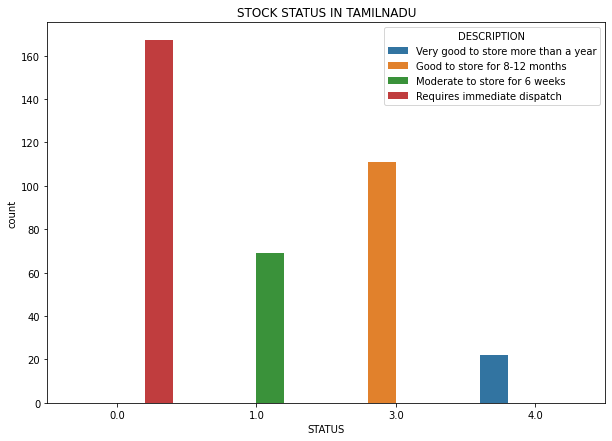

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'STATUS',hue = 'DESCRIPTION', data = tn_data).set(title='STOCK STATUS IN TAMILNADU')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


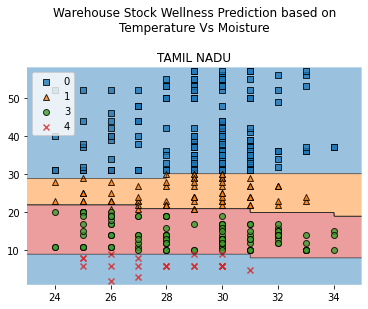

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


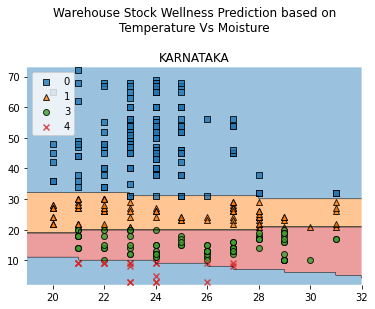

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


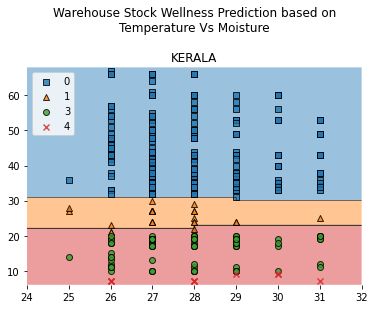

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


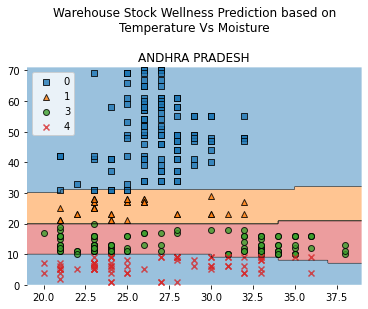

In [ ]:
X1 = tn_data[['TEMPERATURE', 'MOISTURE']].to_numpy()
y1 = tn_data['STATUS'].to_numpy()

clf = SVC(decision_function_shape='ovo')
clf.fit(X1, y1) 

plot_decision_regions(X1.astype(np.integer), y1.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Moisture\n\nTAMIL NADU')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X2 = ka_data[['TEMPERATURE', 'MOISTURE']].to_numpy()
y2 = ka_data['STATUS'].to_numpy()

clf.fit(X2,y2)


plot_decision_regions(X2.astype(np.integer), y2.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Moisture\n\nKARNATAKA')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X3 = kl_data[['TEMPERATURE', 'MOISTURE']].to_numpy()
y3 = kl_data['STATUS'].to_numpy()

clf.fit(X3,y3)


plot_decision_regions(X3.astype(np.integer), y3.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Moisture\n\nKERALA')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X4 = ap_data[['TEMPERATURE', 'MOISTURE']].to_numpy()
y4 = ap_data['STATUS'].to_numpy()

clf.fit(X4,y4)


plot_decision_regions(X4.astype(np.integer), y4.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Moisture\n\nANDHRA PRADESH')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


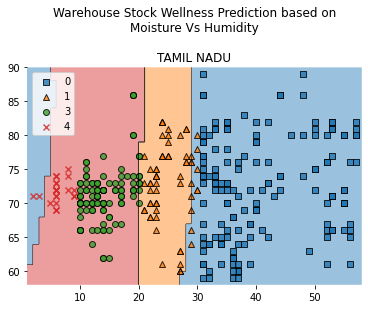

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


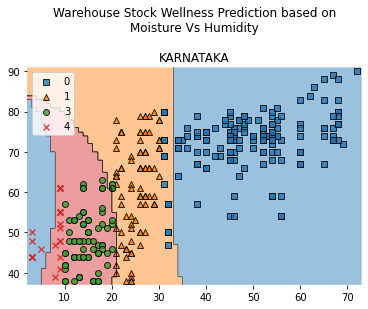

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


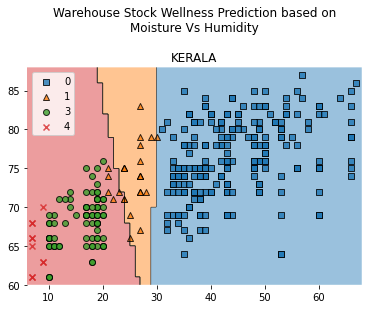

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


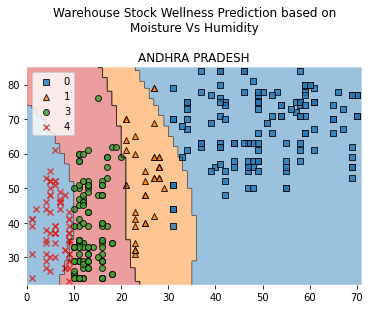

In [ ]:
X1 = tn_data[['MOISTURE', 'HUMIDITY']].to_numpy()
y1 = tn_data['STATUS'].to_numpy()

clf = SVC(decision_function_shape='ovo')
clf.fit(X1, y1) 

plot_decision_regions(X1.astype(np.integer), y1.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nMoisture Vs Humidity\n\nTAMIL NADU')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X2 = ka_data[['MOISTURE', 'HUMIDITY']].to_numpy()
y2 = ka_data['STATUS'].to_numpy()

clf.fit(X2,y2)


plot_decision_regions(X2.astype(np.integer), y2.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nMoisture Vs Humidity\n\nKARNATAKA')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X3 = kl_data[['MOISTURE', 'HUMIDITY']].to_numpy()
y3 = kl_data['STATUS'].to_numpy()

clf.fit(X3,y3)


plot_decision_regions(X3.astype(np.integer), y3.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nMoisture Vs Humidity\n\nKERALA')
plt.legend(loc='upper left')
plt.show()

#################################################################################################################################################################################

X4 = ap_data[['MOISTURE', 'HUMIDITY']].to_numpy()
y4 = ap_data['STATUS'].to_numpy()

clf.fit(X4,y4)


plot_decision_regions(X4.astype(np.integer), y4.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nMoisture Vs Humidity\n\nANDHRA PRADESH')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


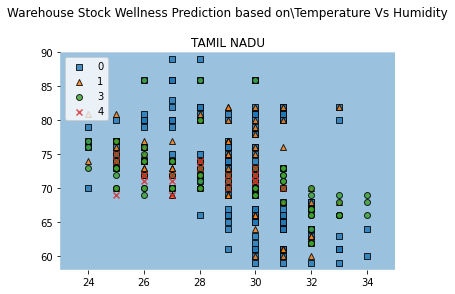

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


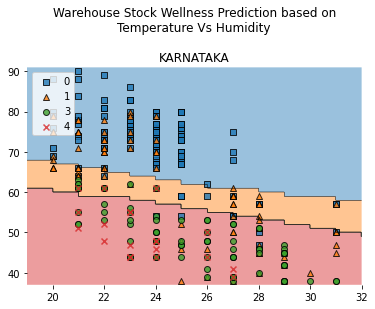

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


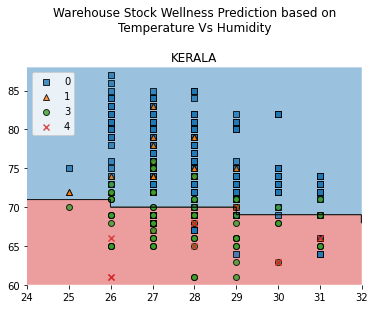

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


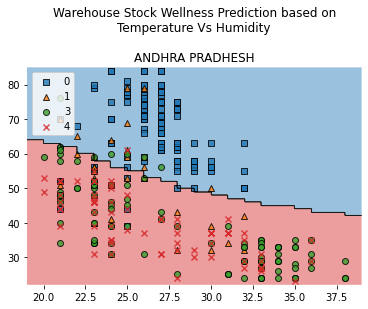

In [ ]:
X1 = tn_data[['TEMPERATURE', 'HUMIDITY']].to_numpy()
y1 = tn_data['STATUS'].to_numpy()

clf = SVC(decision_function_shape='ovo')
clf.fit(X1, y1) 

plot_decision_regions(X1.astype(np.integer), y1.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\Temperature Vs Humidity\n\nTAMIL NADU')
plt.legend(loc='upper left')
plt.show()

###################################################################################################################################################################################

X2 = ka_data[['TEMPERATURE', 'HUMIDITY']].to_numpy()
y2 = ka_data['STATUS'].to_numpy()

clf.fit(X2,y2)

plot_decision_regions(X2.astype(np.integer), y2.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Humidity\n\nKARNATAKA')
plt.legend(loc='upper left')
plt.show()

###################################################################################################################################################################################

X3 = kl_data[['TEMPERATURE', 'HUMIDITY']].to_numpy()
y3 = kl_data['STATUS'].to_numpy()

clf.fit(X3,y3)

plot_decision_regions(X3.astype(np.integer), y3.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Humidity\n\nKERALA')
plt.legend(loc='upper left')
plt.show()

###################################################################################################################################################################################

X4 = ap_data[['TEMPERATURE', 'HUMIDITY']].to_numpy()
y4 = ap_data['STATUS'].to_numpy()

clf.fit(X4,y4)

plot_decision_regions(X4.astype(np.integer), y4.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction based on\nTemperature Vs Humidity\n\nANDHRA PRADHESH')
plt.legend(loc='upper left')
plt.show()

**INFERENCE**

In [ ]:
from sklearn.decomposition import PCA
g = PCA(n_components=2)
y1 = tn_data['STATUS'].to_numpy()
y2 = ka_data['STATUS'].to_numpy()
y3 = kl_data['STATUS'].to_numpy()
y4 = ap_data['STATUS'].to_numpy()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


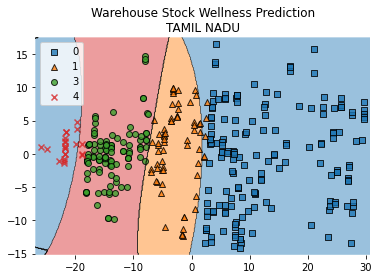

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


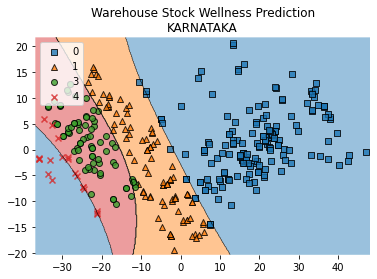

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


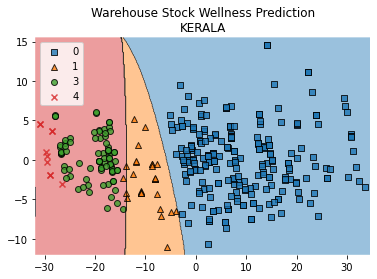

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


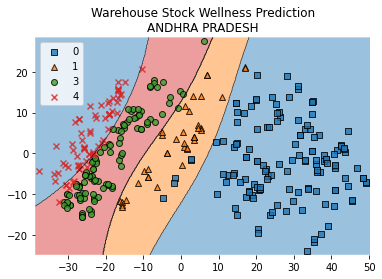

In [ ]:
principalComponents1 = g.fit_transform(tn_data[['HUMIDITY','TEMPERATURE', 'MOISTURE']])
clf.fit(principalComponents1, y1) 
plot_decision_regions(principalComponents1, y1.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction\nTAMIL NADU')
plt.legend(loc='upper left')
plt.show()


principalComponents2 = g.fit_transform(ka_data[['HUMIDITY','TEMPERATURE', 'MOISTURE']])
clf.fit(principalComponents2, y2) 
plot_decision_regions(principalComponents2, y2.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction\nKARNATAKA')
plt.legend(loc='upper left')
plt.show()


principalComponents3 = g.fit_transform(kl_data[['HUMIDITY','TEMPERATURE', 'MOISTURE']])
clf.fit(principalComponents3, y3) 
plot_decision_regions(principalComponents3, y3.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction\nKERALA')
plt.legend(loc='upper left')
plt.show()


principalComponents4 = g.fit_transform(ap_data[['HUMIDITY','TEMPERATURE', 'MOISTURE']])
clf.fit(principalComponents4, y4) 
plot_decision_regions(principalComponents4, y4.astype(np.integer), clf=clf, legend=2)
plt.title('Warehouse Stock Wellness Prediction\nANDHRA PRADESH')
plt.legend(loc='upper left')
plt.show()